# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

In [8]:
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))


# 訓練模型

In [10]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [11]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 10s 203us/step - loss: 0.2397 - acc: 0.9289 - val_loss: 0.1181 - val_acc: 0.9640
Epoch 2/10
48000/48000 [==============================] - 9s 186us/step - loss: 0.0931 - acc: 0.9714 - val_loss: 0.0992 - val_acc: 0.9695
Epoch 3/10
48000/48000 [==============================] - 9s 182us/step - loss: 0.0631 - acc: 0.9800 - val_loss: 0.0909 - val_acc: 0.9728
Epoch 4/10
48000/48000 [==============================] - 9s 185us/step - loss: 0.0473 - acc: 0.9846 - val_loss: 0.0828 - val_acc: 0.9767
Epoch 5/10
48000/48000 [==============================] - 9s 185us/step - loss: 0.0364 - acc: 0.9882 - val_loss: 0.0865 - val_acc: 0.9763
Epoch 6/10
48000/48000 [==============================] - 9s 189us/step - loss: 0.0279 - acc: 0.9904 - val_loss: 0.1020 - val_acc: 0.9742
Epoch 7/10
48000/48000 [==============================] - 9s 185us/step -

# 以圖形顯示訓練過程

In [12]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

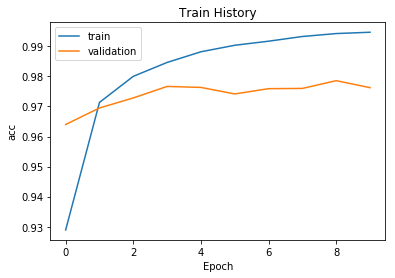

In [13]:
show_train_history(train_history,'acc','val_acc')

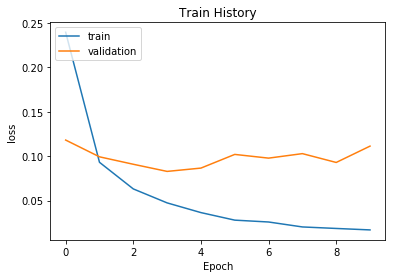

In [14]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [15]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 39us/step

accuracy= 0.9798


# 模型 二 

In [16]:
model_2 = Sequential()

In [17]:
# construct the input layer
model_2.add(Dense(units = 256,
                 input_dim = 784,
                 kernel_initializer = 'normal',
                 activation = 'relu'))

In [18]:
# construct the output layer
model_2.add(Dense(units = 10,
               kernel_initializer = 'normal',
               activation = 'softmax'))

In [19]:
model_2.compile(loss = 'categorical_crossentropy',
               optimizer= 'adam', metrics=['accuracy'])

In [20]:
train_history = model_2.fit(x = x_Train_normalize,
                           y = y_Train_OneHot, validation_split=0.2,
                           epochs=6, batch_size=32, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/6
48000/48000 [==============================] - 7s 143us/step - loss: 0.2709 - acc: 0.9233 - val_loss: 0.1555 - val_acc: 0.9541
Epoch 2/6
48000/48000 [==============================] - 7s 139us/step - loss: 0.1122 - acc: 0.9666 - val_loss: 0.1178 - val_acc: 0.9627
Epoch 3/6
48000/48000 [==============================] - 6s 135us/step - loss: 0.0726 - acc: 0.9785 - val_loss: 0.0943 - val_acc: 0.9725
Epoch 4/6
48000/48000 [==============================] - 7s 137us/step - loss: 0.0515 - acc: 0.9841 - val_loss: 0.0795 - val_acc: 0.9765
Epoch 5/6
48000/48000 [==============================] - 7s 136us/step - loss: 0.0370 - acc: 0.9885 - val_loss: 0.0945 - val_acc: 0.9732
Epoch 6/6
48000/48000 [==============================] - 6s 134us/step - loss: 0.0293 - acc: 0.9908 - val_loss: 0.0907 - val_acc: 0.9738


In [21]:
import matplotlib.pyplot as plt
def show_train_history2(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History2')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'], loc = 'upper left')
    plt.show()

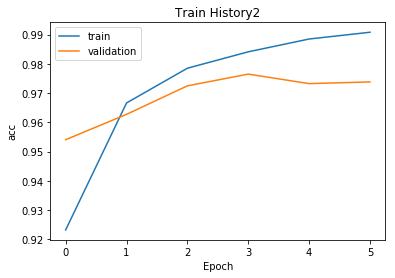

In [22]:
show_train_history2(train_history,'acc','val_acc')

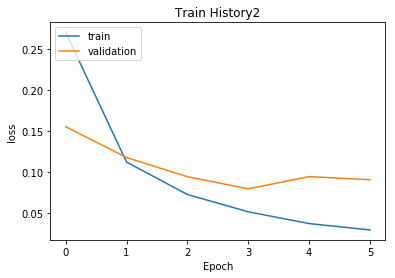

In [23]:
show_train_history2(train_history,'loss','val_loss')

In [24]:
scores = model_2.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 34us/step

accuracy= 0.9768
